In [ ]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Input, concatenate
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from datetime import datetime
import cv2
import os
import zipfile
import shutil
from glob import glob

import tensorflow.keras.utils as utils

from tensorflow.keras.applications import Xception, ResNet50, InceptionV3, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
ROOT_DIR = '/content'
DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'car_damage_type_0703')
TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'train')
TEST_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'test')

In [ ]:
#### Colab

from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)
print('mount is completed')

data_path = "/content/gdrive/MyDrive/"

shutil.copy(os.path.join('/content/gdrive/My Drive/FINAL PROJECT/', 'car_damage_type_0703.zip'), ROOT_DIR)

if os.path.exists(DATA_ROOT_DIR):
    shutil.rmtree(DATA_ROOT_DIR)

with zipfile.ZipFile(os.path.join(ROOT_DIR, 'car_damage_type_0703.zip'), 'r') as target_file:
    target_file.extractall(DATA_ROOT_DIR)

Mounted at /content/gdrive
mount is completed


In [ ]:
label_name_list = os.listdir(DATA_ROOT_DIR)


for i in range(len(label_name_list)):

    path = os.path.join(DATA_ROOT_DIR, os.listdir(DATA_ROOT_DIR)[i])
    print(os.listdir(DATA_ROOT_DIR)[i], len(os.listdir(path)))

car_damage_type 3
__MACOSX 1


# 그래프 함수 정의

In [ ]:
def acc_loss_plots(result):

  plt.figure(figsize=(8, 4))

  plt.subplot(1, 2, 1)

  plt.title("LOSS")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.grid()

  plt.plot(result.history["loss"], label="train_loss")
  plt.plot(result.history["val_loss"], label="validation_loss")



  plt.subplot(1, 2, 2)
  plt.title("acc")
  plt.xlabel("epochs")
  plt.ylabel("acc")
  plt.grid()

  plt.plot(result.history["accuracy"], label="train_acc")
  plt.plot(result.history["val_accuracy"], label="validation_acc")

  plt.legend(loc="best")
  plt.tight_layout()
  plt.show()

# test dir 및 하위 디렉토리 생성

In [ ]:
# if not os.path.exists(TEST_DATA_ROOT_DIR):
#     os.mkdir(TEST_DATA_ROOT_DIR)
#     print(TEST_DATA_ROOT_DIR + ' is created')
# else:
#     print(TEST_DATA_ROOT_DIR + ' is already extists')

# for label_name in label_name_list:
#     if not os.path.exists(os.path.join(TEST_DATA_ROOT_DIR, label_name)):
#         os.mkdir(os.path.join(TEST_DATA_ROOT_DIR, label_name))
#         print(os.path.join(TEST_DATA_ROOT_DIR, label_name) + ' is created')
#     else:
#         print(os.path.join(TEST_DATA_ROOT_DIR, label_name) + ' is already extists')


## 파일 개수 확인, 셔플 이동

In [ ]:

# MOVE_RATIO = 0.2
# move_num = 0

# for label_name in label_name_list:
#     src = os.path.join(DATA_ROOT_DIR, label_name)
#     dst = os.path.join(TEST_DATA_ROOT_DIR, label_name)

#     train_data_file_list = os.listdir(src)

#     print("-----------------------------------------")
#     print("total [%s] data file nums => [%s]"%(label_name, len(train_data_file_list)))

#     np.random.shuffle(train_data_file_list)
#     print("train data shuffle is done!!!")

#     split_num = int(MOVE_RATIO * len(train_data_file_list))
#     print("split nums =>", split_num)

#     test_data_file_list = train_data_file_list[0:split_num]

#     move_nums = 0
#     for test_data_file in test_data_file_list:
#         shutil.move(os.path.join(src, test_data_file),
#                    os.path.join(dst, test_data_file))

#         move_num = move_num + 1
#     print("total mov num =>", move_num)
#     print("-----------------------------------------")

# 폴더 train으로 안묶어서 묶어주기

In [ ]:
# # for_train_list = os.listdir(DATA_ROOT_DIR)

# train_list = ['Separated', 'Breakaged', 'Crush', 'Scratched']
# train_list

In [ ]:
# if not os.path.exists(TRAIN_DATA_ROOT_DIR):
#     os.mkdir(TRAIN_DATA_ROOT_DIR)
#     print(TRAIN_DATA_ROOT_DIR + ' is created')
# else:
#     print(TRAIN_DATA_ROOT_DIR + ' is already extists')

# for label_name in train_list:
#     if not os.path.exists(os.path.join(TRAIN_DATA_ROOT_DIR, label_name)):
#         os.mkdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))
#         print(os.path.join(TRAIN_DATA_ROOT_DIR, label_name) + ' is created')
#     else:
#         print(os.path.join(TRAIN_DATA_ROOT_DIR, label_name) + ' is already extists')

In [ ]:
print(TRAIN_DATA_ROOT_DIR)
print(DATA_ROOT_DIR)

/content/car_damage_type_5569/car_damage_type/train
/content/car_damage_type_5569/car_damage_type


In [ ]:
# for label_name in train_list:
#     shutil.move(os.path.join(DATA_ROOT_DIR, label_name), os.path.join(TRAIN_DATA_ROOT_DIR, label_name))

# 경로 다시 보고 잡기

In [ ]:
ROOT_DIR = '/content'
# /content/car_damage_type/car_damage_type
DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'car_damage_type_0703/car_damage_type_0703/car_damage_type')
TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'train')
TEST_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'test')
TRAIN_DATA_ROOT_DIR

'/content/car_damage_type_0703/car_damage_type_0703/car_damage_type/train'

## ImageDataGenerator를 이용하여 데이터 불러오기

In [ ]:
IMAGE_SIZE = 224

train_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_data_gen = ImageDataGenerator(rescale=1./255)



train_generator = train_data_gen.flow_from_directory(directory=TRAIN_DATA_ROOT_DIR,
                                                batch_size=32, color_mode='rgb',
                                                target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                class_mode = 'sparse', shuffle = True,
                                                subset='training')

val_generator = train_data_gen.flow_from_directory(directory=TRAIN_DATA_ROOT_DIR,
                                                batch_size=32, color_mode='rgb',
                                                target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                class_mode = 'sparse', shuffle = True,
                                                subset='validation')

test_generator = test_data_gen.flow_from_directory(directory=TEST_DATA_ROOT_DIR,
                                                batch_size=32, color_mode='rgb',
                                                target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                class_mode = 'sparse', shuffle = True)

Found 9249 images belonging to 4 classes.
Found 2310 images belonging to 4 classes.
Found 4452 images belonging to 4 classes.


In [ ]:
print(train_generator.class_indices)
print(train_generator.num_classes)

{'breakeage': 0, 'crush': 1, 'scratch': 2, 'separate': 3}
4


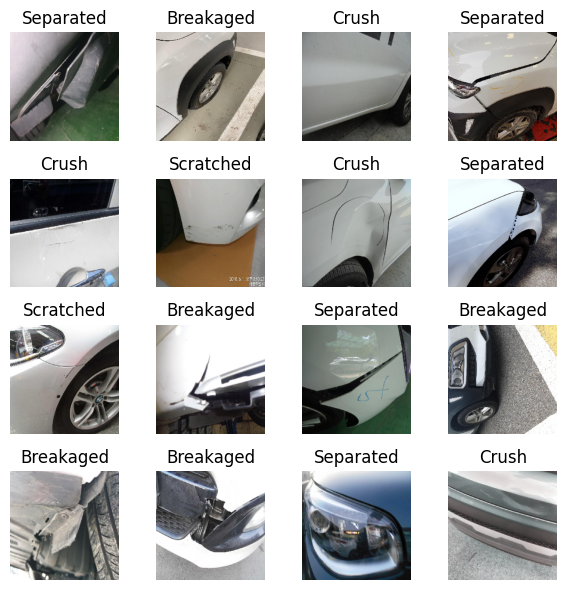

In [ ]:
### 16 장의 이미지 확인


img, label = train_generator.next()
img = img[:16]
label = label[:16]

class_name = {0: 'Breakaged', 1: 'Crush', 2: 'Scratched', 3: 'Separated'}

plt.figure(figsize=(6, 6))
for i in range(len(img)):
    plt.subplot(4, 4, i+1)
    plt.title(class_name[int(label[i])])
    plt.imshow(img[i])
    plt.axis('off')
plt.tight_layout()


# 모델링 테스트

## (1) CCP CCP F D D

In [ ]:
model = Sequential()

### 1st layer
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
                 padding='same',
                 activation='relu'))

model.add(Conv2D(filters=32,
                 kernel_size=3,
                 input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2))) #, padding="same"
model.add(Dropout(0.25))

### 2nd layer
model.add(Conv2D(filters=64,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))

model.add(Conv2D(filters=64,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2))) #, padding="same"
model.add(Dropout(0.25))

# F

model.add(Flatten())

# hidden layer

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.6))

model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(learning_rate=0.0001),
             metrics=['accuracy'])

tf_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# checkpoint_callback = keras.callbacks.ModelCheckpoint(
#     'checkpoint.h5',  # 체크포인트 파일 이름
#     save_weights_only=True,  # 가중치만 저장
#     save_best_only=True,  # 가장 좋은 성능을 나타내는 체크포인트만 저장
#     monitor='val_loss',  # 모니터링할 지표 선택 (예: 검증 손실)
#     mode='min'  # 모니터링 지표의 최소화를 목표로 함
# )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                        

In [ ]:
from datetime import datetime

start_time = datetime.now()

result = model.fit(train_generator, epochs=30, validation_data=val_generator, callbacks=[tf_stop]) # epochs = 10? 30?

end_time = datetime.now()

print('Run time :', end_time - start_time)

Epoch 1/30
446/446 [==============================] - 191s 428ms/step - loss: 1.3865 - accuracy: 0.2511 - val_loss: 1.3848 - val_accuracy: 0.2809
Epoch 2/30
446/446 [==============================] - 188s 421ms/step - loss: 1.3864 - accuracy: 0.2510 - val_loss: 1.3863 - val_accuracy: 0.2506
Epoch 3/30
331/446 [=====================>........] - ETA: 39s - loss: 1.3863 - accuracy: 0.2479

KeyboardInterrupt: ignored

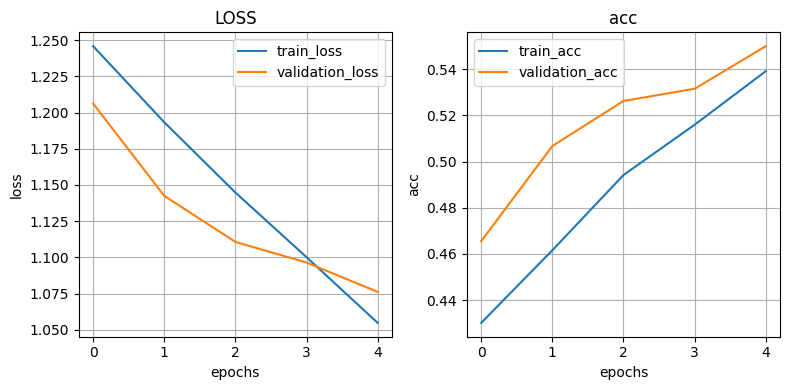

In [ ]:
# plt.figure(figsize=(8, 4))

# plt.subplot(1, 2, 1)

# plt.title("LOSS")
# plt.xlabel("epochs")
# plt.ylabel("loss")
# plt.grid()

# plt.plot(result.history["loss"], label="train_loss")
# plt.plot(result.history["val_loss"], label="validation_loss")
# plt.legend(loc="best")
# # plt.show()

# plt.subplot(1, 2, 2)

# plt.title("acc")
# plt.xlabel("epochs")
# plt.ylabel("acc")
# plt.grid()

# plt.plot(result.history["accuracy"], label="train_acc")
# plt.plot(result.history["val_accuracy"], label="validation_acc")
# plt.legend(loc="best")
# plt.tight_layout()
# plt.show()

acc_loss_plots(result)

In [ ]:
model.evaluate(test_generator)

1264/1264 [==============================] - 419s 331ms/step - loss: 0.5296 - accuracy: 0.8373


[0.5296220183372498, 0.8373002409934998]

### 모델 저장

In [ ]:
# 모델 세이브
model.save('CCPCCPFDD_Adam_1.h5')

# 모델 로드
# model = keras.models.load_model('CCPCCPFDD_Adam_1.h5')

# 모델링 테스트

## (1) CCP CCP F D D

In [ ]:
model = Sequential()

### 1st layer
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
                 padding='same',
                 activation='relu'))

model.add(Conv2D(filters=32,
                 kernel_size=3,
                 input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2))) #, padding="same"
model.add(Dropout(0.25))

### 2nd layer
model.add(Conv2D(filters=64,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))

model.add(Conv2D(filters=64,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2))) #, padding="same"
model.add(Dropout(0.25))

# F

model.add(Flatten())

# hidden layer

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.6))

model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(learning_rate=0.001),
             metrics=['accuracy'])

tf_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    'lastmodel.h5',  # 체크포인트 파일 이름
    save_weights_only=True,  # 가중치만 저장
    save_best_only=True,  # 가장 좋은 성능을 나타내는 체크포인트만 저장
    monitor='val_loss',  # 모니터링할 지표 선택 (예: 검증 손실)
    mode='min'  # 모니터링 지표의 최소화를 목표로 함
)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_25 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 conv2d_26 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 112, 112, 64)      36928     
                                                      

In [ ]:
from datetime import datetime

start_time = datetime.now()

result = model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[tf_stop]) # epochs = 10? 30?

end_time = datetime.now()

print('Run time :', end_time - start_time)

Epoch 1/10
   3/1158 [..............................] - ETA: 4:28 - loss: 11.2621 - accuracy: 0.3646

KeyboardInterrupt: ignored

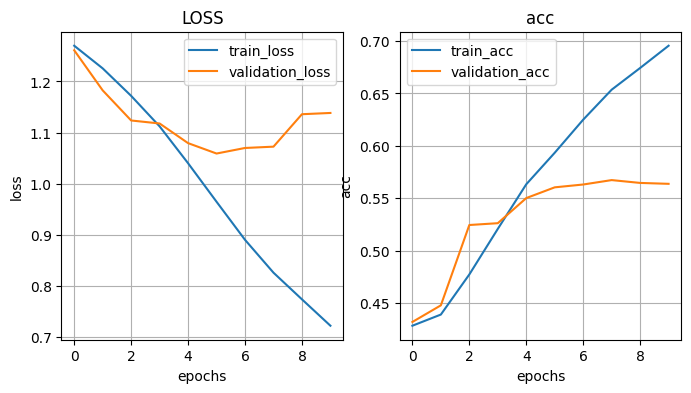

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")
# plt.show()

plt.subplot(1, 2, 2)

plt.title("acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.grid()

plt.plot(result.history["accuracy"], label="train_acc")
plt.plot(result.history["val_accuracy"], label="validation_acc")
plt.legend(loc="best")
plt.show()

# 코랩에서 epochs 조금씩 반복

1. 현재 코드 4번씩 반복후 모델 점수 측정
2. lastmodel.h5 로 저장.
2. 실행중 오류나면 err_lastmodel.h5 저장

## 그래프로 표현은 힘들다?
그래프 함수 정의해두고 그리기
단점 : 반복시 이전 그래프 사라짐.


In [ ]:
try:
  cnt = 0
  while():
    # 로드할 모델 있는지 확인
    model_file = 'lastmodel.h5'

    if os.path.exists(model_file):
      # 모델 존재하면 로드
      model = tf.keras.models.load_model('lastmodel.h5)')
    else:
      model = Sequential()

      ### 1st layer
      model.add(Conv2D(filters=32,
                      kernel_size=3,
                      input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
                      padding='same',
                      activation='relu'))

      model.add(Conv2D(filters=32,
                      kernel_size=3,
                      input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
                      padding='same',
                      activation='relu'))

      model.add(MaxPool2D(pool_size=(2,2))) #, padding="same"
      model.add(Dropout(0.25))

      ### 2nd layer
      model.add(Conv2D(filters=64,
                      kernel_size=3,
                      padding='same',
                      activation='relu'))

      model.add(Conv2D(filters=64,
                      kernel_size=3,
                      padding='same',
                      activation='relu'))

      model.add(MaxPool2D(pool_size=(2,2))) #, padding="same"
      model.add(Dropout(0.25))

      # F

      model.add(Flatten())

      # hidden layer

      model.add(Dense(128, activation='relu'))
      model.add(Dropout(0.6))

      # model.add(Dense(128, activation='relu'))
      # model.add(Dropout(0.6))

      model.add(Dense(4, activation='softmax'))

      model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

      tf_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
      checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
          'lastmodel.h5',  # 체크포인트 파일 이름
          save_weights_only=True,  # 가중치만 저장
          save_best_only=True,  # 가장 좋은 성능을 나타내는 체크포인트만 저장
          monitor='val_loss',  # 모니터링할 지표 선택 (예: 검증 손실)
          mode='min'  # 모니터링 지표의 최소화를 목표로 함
      )
      model.summary()

    for i in range(4): # epochs 4번씩 반복
      result = model.fit(train_generator, epochs=4, validation_data=val_generator, callbacks=[tf_stop, checkpoint_callback])
      cnt += 1
      acc_loss_plots(result)
      print(cnt, model.evaluate(test_generator))

    model.save('lastmodel.h5') # 4번 돌고 최신 모델로 저장
  print("머신러닝 작업이 완료되었습니다.")
except Exception as e:
  # 예외가 발생한 경우 예외 처리
  print("예외가 발생했습니다:", str(e))
  model.save('err_lastmodel.h5') # 4번 돌고 최신 모델로 저장


머신러닝 작업이 완료되었습니다.


# 5569개 통일
## 1. MobilNet 모델

In [ ]:
base_model = MobileNet(weights='imagenet',
                       include_top=False,
                       input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)) # include_top 모델에 분류기 학습기 같이 가져옴. false는 학습기는 안가져온다. 따로 추가 필요.
#base_model.summary()

model = Sequential()  # Fc계층 만들어주기

model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation="relu"))  # 은닉층
model.add(Dropout(0.65))
# model.add(Dense(128, activation="relu"))  # 은닉층
# model.add(Dropout(0.65))

model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(learning_rate=1e-5),
             metrics=['accuracy'])

tf_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                3211328   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 4)                 260       
                                                                 
Total params: 6,440,452
Trainable params: 6,418,564
Non-trainable params: 21,888
_______________________________________

In [ ]:
from datetime import datetime

start_time = datetime.now()

result = model.fit(train_generator, epochs=30, validation_data=val_generator, callbacks=[tf_stop]) # epochs = 10? 30?

end_time = datetime.now()

print('Run time :', end_time - start_time)

Epoch 1/30
290/290 [==============================] - 153s 472ms/step - loss: 1.6290 - accuracy: 0.3283 - val_loss: 1.2854 - val_accuracy: 0.3848
Epoch 2/30
290/290 [==============================] - 116s 399ms/step - loss: 1.2916 - accuracy: 0.3858 - val_loss: 1.2036 - val_accuracy: 0.4455
Epoch 3/30
290/290 [==============================] - 118s 406ms/step - loss: 1.2129 - accuracy: 0.4297 - val_loss: 1.1187 - val_accuracy: 0.5104
Epoch 4/30
290/290 [==============================] - 117s 402ms/step - loss: 1.1175 - accuracy: 0.4931 - val_loss: 1.0158 - val_accuracy: 0.5883
Epoch 5/30
290/290 [==============================] - 138s 477ms/step - loss: 1.0341 - accuracy: 0.5332 - val_loss: 0.9539 - val_accuracy: 0.6221
Epoch 6/30
290/290 [==============================] - 116s 400ms/step - loss: 0.9478 - accuracy: 0.5816 - val_loss: 0.8997 - val_accuracy: 0.6489
Epoch 7/30
290/290 [==============================] - 118s 406ms/step - loss: 0.8769 - accuracy: 0.6219 - val_loss: 0.8792 -

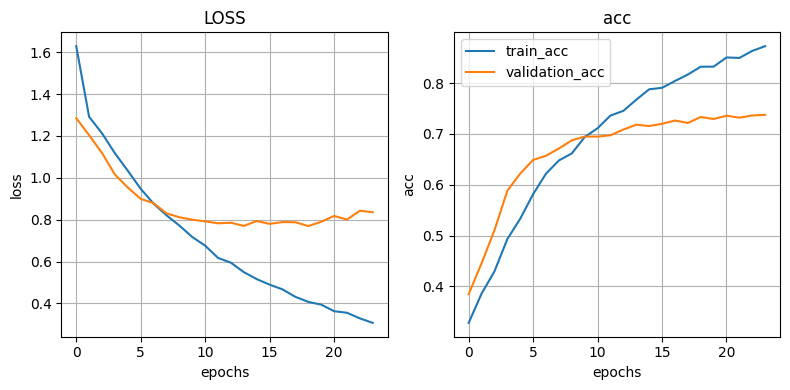

In [ ]:
acc_loss_plots(result)

In [ ]:
model.evaluate(test_generator)

140/140 [==============================] - 44s 316ms/step - loss: 1.3102 - accuracy: 0.6076


[1.3101632595062256, 0.6075921058654785]

In [ ]:
from keras.saving.legacy.save import save_model
save_model(model, 'model_mobilenet.h5')

## 2. ResNet50 모델

In [ ]:
from matplotlib.cbook import flatten
base_model = ResNet50(weights='imagenet',
                       include_top=False,
                       input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

model = Sequential()  # Fc계층 만들어주기

model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation="relu"))  # 은닉층
model.add(Dropout(0.65))


model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(learning_rate=1e-5),
             metrics=['accuracy'])

tf_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                6422592   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 30,010,564
Trainable params: 29,957,444
Non-trainable params: 53,120
______________________________________

In [ ]:
from datetime import datetime

start_time = datetime.now()

result = model.fit(train_generator, epochs=25, validation_data=val_generator, callbacks=[tf_stop], batch_size=32) # epochs = 10? 30?

end_time = datetime.now()

print('Run time :', end_time - start_time)

Epoch 1/25
290/290 [==============================] - 188s 482ms/step - loss: 1.6232 - accuracy: 0.3431 - val_loss: 1.3851 - val_accuracy: 0.3026
Epoch 2/25
290/290 [==============================] - 157s 539ms/step - loss: 1.2212 - accuracy: 0.4366 - val_loss: 1.3200 - val_accuracy: 0.3861
Epoch 3/25
290/290 [==============================] - 139s 479ms/step - loss: 1.0507 - accuracy: 0.5358 - val_loss: 1.1353 - val_accuracy: 0.5325
Epoch 4/25
290/290 [==============================] - 137s 473ms/step - loss: 0.9023 - accuracy: 0.6027 - val_loss: 0.8891 - val_accuracy: 0.6455
Epoch 5/25
290/290 [==============================] - 156s 539ms/step - loss: 0.7860 - accuracy: 0.6596 - val_loss: 0.8445 - val_accuracy: 0.6714
Epoch 6/25
290/290 [==============================] - 138s 477ms/step - loss: 0.6870 - accuracy: 0.7105 - val_loss: 0.8148 - val_accuracy: 0.6844
Epoch 7/25
290/290 [==============================] - 137s 472ms/step - loss: 0.5822 - accuracy: 0.7512 - val_loss: 0.7850 -

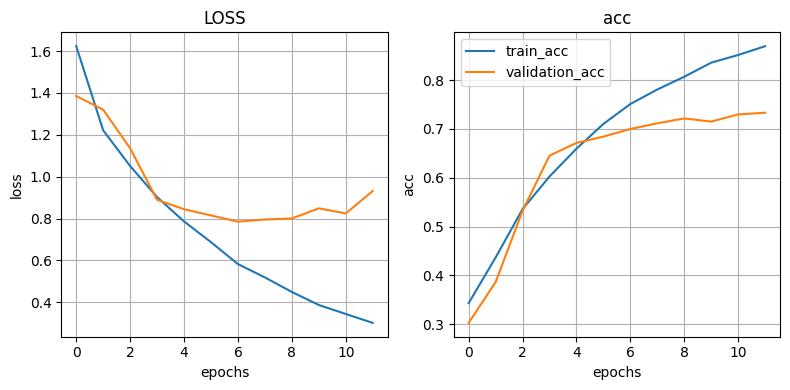

In [ ]:
acc_loss_plots(result)

In [ ]:
model.evaluate(test_generator)


140/140 [==============================] - 45s 322ms/step - loss: 1.5321 - accuracy: 0.6226


[1.5321491956710815, 0.6226415038108826]

In [ ]:
save_model(model, 'model_score.h5')

NameError: ignored

In [ ]:
from keras.saving.legacy.save import save_model
save_model(model, 'model_score_50.h5')

# 데이터 절사
## MobilNet 모델

In [ ]:
base_model = MobileNet(weights='imagenet',
                       include_top=False,
                       input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)) # include_top 모델에 분류기 학습기 같이 가져옴. false는 학습기는 안가져온다. 따로 추가 필요.
#base_model.summary()

model = Sequential()  # Fc계층 만들어주기

model.add(base_model)
model.add(Flatten())
model.add(Dense(32, activation="relu"))  # 은닉층
model.add(Dropout(0.65))
# model.add(Dense(128, activation="relu"))  # 은닉층
# model.add(Dropout(0.65))

model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(learning_rate=1e-5),
             metrics=['accuracy'])

tf_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 32)                1605664   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4,834,660
Trainable params: 4,812,772
Non-t

In [ ]:
from datetime import datetime

start_time = datetime.now()

result = model.fit(train_generator, epochs=30, validation_data=val_generator, callbacks=[tf_stop]) # epochs = 10? 30?

end_time = datetime.now()

print('Run time :', end_time - start_time)

Epoch 1/30
290/290 [==============================] - 144s 496ms/step - loss: 0.5356 - accuracy: 0.7508 - val_loss: 0.8692 - val_accuracy: 0.7208
Epoch 2/30
290/290 [==============================] - 113s 389ms/step - loss: 0.5326 - accuracy: 0.7575 - val_loss: 0.8907 - val_accuracy: 0.7169
Epoch 3/30
290/290 [==============================] - 114s 393ms/step - loss: 0.5299 - accuracy: 0.7568 - val_loss: 0.8836 - val_accuracy: 0.7160
Epoch 4/30
290/290 [==============================] - 113s 389ms/step - loss: 0.5067 - accuracy: 0.7652 - val_loss: 0.8874 - val_accuracy: 0.7212
Epoch 5/30
290/290 [==============================] - 115s 398ms/step - loss: 0.4834 - accuracy: 0.7797 - val_loss: 0.8979 - val_accuracy: 0.7190
Epoch 6/30
290/290 [==============================] - 133s 459ms/step - loss: 0.4749 - accuracy: 0.7798 - val_loss: 0.8918 - val_accuracy: 0.7273
Run time : 0:12:38.813589


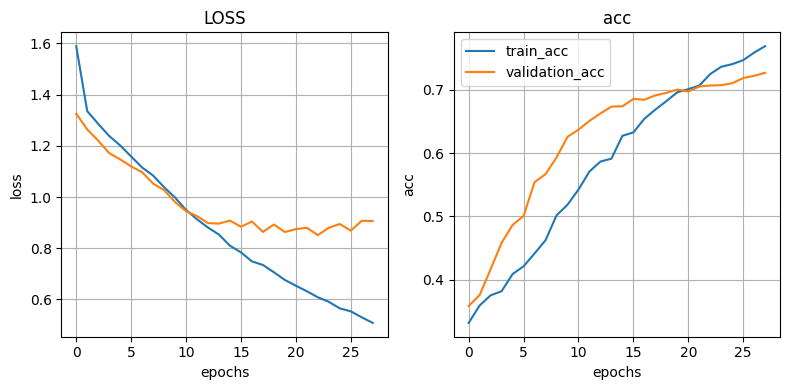

In [ ]:
acc_loss_plots(result)

In [ ]:
model.evaluate(test_generator)

140/140 [==============================] - 43s 308ms/step - loss: 1.4178 - accuracy: 0.6056


[1.4177520275115967, 0.6055705547332764]

In [ ]:
from keras.saving.legacy.save import save_model
save_model(model, 'model_mobilenet.h5')